In [ ]:
import numpy as np
import re
import pandas as pd
from scipy.spatial import distance


In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# Generating random amino acid sequences

https://jamimmunology.blogspot.com/2012/11/generating-random-biological-sequences.html

In [ ]:
import random
import matplotlib.pyplot as plt # plot

def random_AA_seq(length):
    return ''.join(random.choice('ACDEFGHIKLMNPQRSTVWY') for i in range(length))

list_size = 50 # sequence number 

random_seq = []

for j in range(list_size):

    a = random.randint(20, 30) # min and max length of a sequence 
    a = 
    random_seq.append(random_AA_seq(a)) 
    print(random_AA_seq(a))

IPEQTTCPWEQHDKSRALDYHEPTYKF
CYKDMDCWAQISQPPVEAQSSWNKRWAM
MEHFKVFENWNDKDVTGKLHM
QEAGKLSYSTMIQWRHGEYCQHAHGVAAE
NAWGARHNMFDTEAYFNLDDC
SSQQKLYLASLKNIGRWKGCYPYDG
PEINWAYTCDDMAFEWYVDWSHAYI
LFHMMRHLMRSAAKTMWEWELLPEHNF
QWDYLCHWWCFGWVRDFQGDVKKK
IAEIIKMVYHADRDRIGNVEPLT
VRKTFDQMGLEYTYEIPLHAEPMD
VFQGPILVPNNLFEIANHWNKFIFYL
CEVCITADYEHDHHWDDYKGGAYHTYCTD
FQWGCRVHHSLHYNNQIKMPRCLPE
TSIWFEEHLCRAEVDEQALR
TCFKMNEWSKCEMYVNRDCWFLYQLQNYRD
QRIHWYKNWNPKIVEKYDWVKMKK
GHSGMKITVVKVAKQRHCDI
RLMQYDDGTTCELSPFFWIKD
MMHQIVYEPLGAENGIHWNWN
NIMDIEKHWGRIDKIGSVADWCVKFQ
DYSDWYIYFTPRVCLPKIMNTRVMQAMEPP
ICEHSMDRANWDHVMNPVHW
WWPYFMGGHTFIKRTHPEEPW
IKIRTKMAWKCEVDNQMQTAQAMHHAG
THCMQQTLEDVCPRVCNPTMDP
IDDHLSLQHSIQDPNCWGGR
FCCVPDRIFHPAYNMWRRYVTCEW
EVYLGFHFQDQYKPKDFWQN
PIKLYKSPYVPNCRDGDSDYLWYLRW
VPHQHWNATENRNADQAMMAMHL
AARMFFWSLMREAMMTYFKAM
GTFNLIWYWEFGPTSHGICP
IGINRYLRMDYRFRIECFNP
HIKDTAQGWLMLGHQLAFTMNDITV
YKQHMKCWAMWWGSGVDMMPC
FCPFPRFHKMWLNAWLWFWDCNT
MPKESNFMSCASPMAMPGPGQCGT
YKQWTFTNYWAQDGNACVLYW
DCPHTQTCFNLTMLNDIMTYK
SSGGQTHKNNCPIHY

In [ ]:
ORDER_KEY="XILVAGMFYWEDQNHCRKSTPBZ-"[::-1]
ORDER_LIST=list(ORDER_KEY)

In [ ]:
ORDER_LIST

In [ ]:
fasta_file = "/content/gdrive/MyDrive/Projet_long/uniclus_rep_seq.fasta"

read fasta file and generate 2 list: seqence and sequnce name 

In [ ]:
def Name_Organizer(FASTA):

    import os
    import re

    file=open(FASTA,'r')
    dir,file=os.path.split(FASTA)
    #temp = os.path.join(dir,output)
    #out_file=open(temp,'w')

    data=''
    name_list=[]
    seq_list=[]

    for line in file:

        line=line.strip()
        for i in line:
            if i=='>':
                name_list.append(line) # change this part o just the name of sequences 
                if data:
                    data = " ".join(data)
                    seq_list.append(data)
                    data=''

                break
            else:
                line=line.upper()
        if all([k==k.upper() for k in line]):
            data=data+line

    #print(seq_list)
    return seq_list, name_list



In [ ]:
seq_list, name_list = Name_Organizer(fasta_file) 

In [ ]:
for s in seq_list:
  print( " ".join(s))

In [ ]:
len(seq_list)

278

In [ ]:
name_list 

# Load real sequences

In [ ]:
 casp12 = pd.read_csv('/content/gdrive/MyDrive/Projet_long/CASP12_HHblits.csv') 
 casp12.shape

(20, 5)

In [ ]:
#len(casp12.iloc[15]["input"])
casp12

In [ ]:
sequence = casp12['input'].to_list()
sequence

['S L R F T A S T S T P K S G S K I A K R G K K H P E P V A S W M S E Q R W A G E P E V M C T L Q H K S I A Q E A Y K N Y T I T T S A V C K L V R Q L Q Q Q A L S L Q V H F E R S E R V L S G L Q A S S L P E A L A G A T Q L L S H L D D F T A T L E R R G V F F N D A K I E R R R Y E Q H L E Q I R T V S K D T R Y S L E R Q H Y I N L E S L L D D V Q L L K R H T L I T L R L I F E R L V R V L V I S I E Q S Q C D L L L R A N I N M V A T L M N I D Y D G F R S L S D A F V Q N E A V R T L L V V V L D H K Q S S V R A L A L R A L A T L C C A P Q A I N Q L G S C G G I E I V R D I L Q V E S A G E R G A I E R R E A V S L L A Q I T A A W H G S E H R V P G L R D C A E S L V A G L A A L L Q P E',
 'M G A E E E D T A I L Y P F T I S G N D R N G N F T I N F K G T P N S T N N G C I G Y S Y N G D W E K I E W E G S C D G N G N L V V E V P M S K I P A G V T S G E I Q I W W H S G D L K M T D Y K A L E H H H H H H',
 'G H M A S G P W K L T A S K T H I M K S A D V E K L A D E L H M P S L P E M M F G D N V L R I Q 

In [ ]:
#PRUNED_SEQ_LENGTH=len(data.iloc[0]["seq"])
#PRUNED_SEQ_LENGTH = len(sequence[0])

# Embedding 

https://github.com/agemagician/ProtTrans/tree/master/Embedding

In [ ]:
!pip install -q transformers

In [ ]:
from transformers import TFBertModel, BertTokenizer,BertConfig

In [ ]:
tokenizer = BertTokenizer.from_pretrained("Rostlab/prot_bert", do_lower_case=False )

In [ ]:
model = TFBertModel.from_pretrained("Rostlab/prot_bert", from_pt=True)

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.predictions.decoder.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.bias', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint

tokenize

In [ ]:
ids = tokenizer.batch_encode_plus(sequence, add_special_tokens=True, padding=True, return_tensors="tf")  
#ids

In [ ]:
ids = tokenizer.batch_encode_plus(seq_list, add_special_tokens=True, padding=True, return_tensors="tf")
#ids

In [ ]:
ids

{'input_ids': <tf.Tensor: shape=(278, 3471), dtype=int32, numpy=
array([[ 2, 21, 11, ...,  0,  0,  0],
       [ 2, 21, 13, ...,  0,  0,  0],
       [ 2, 17,  7, ...,  0,  0,  0],
       ...,
       [ 2, 21, 15, ...,  0,  0,  0],
       [ 2, 21,  9, ...,  0,  0,  0],
       [ 2, 21, 10, ...,  0,  0,  0]], dtype=int32)>, 'token_type_ids': <tf.Tensor: shape=(278, 3471), dtype=int32, numpy=
array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int32)>, 'attention_mask': <tf.Tensor: shape=(278, 3471), dtype=int32, numpy=
array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0]], dtype=int32)>}

In [ ]:
input_ids = ids['input_ids'] # TensorShape([20, 1496])
attention_mask = ids['attention_mask']
#input_ids.shape

Embedding with Bert

In [ ]:
embedding = model(input_ids)[0]

In [ ]:
embedding = np.asarray(embedding)
#embedding.shape

In [ ]:
attention_mask = np.asarray(attention_mask)

In [ ]:
embedding

array([[[ 8.19769502e-02,  6.43152595e-02,  4.21448313e-02, ...,
         -6.20769337e-02,  4.48901802e-02, -1.91365778e-02],
        [-2.22610459e-02,  6.59344196e-02,  2.92509198e-02, ...,
         -1.63998082e-02,  9.48458165e-02,  4.62887958e-02],
        [-7.20798224e-03,  1.21902123e-01,  2.35725716e-02, ...,
          4.75132242e-02,  8.57740641e-03,  8.73763412e-02],
        ...,
        [ 2.59848088e-02, -1.96187347e-02,  2.89642811e-03, ...,
          3.35517079e-02,  6.51569292e-02,  4.95532900e-03],
        [ 2.64939107e-02, -1.64126307e-02, -1.07153505e-03, ...,
          2.65870970e-02,  6.31290600e-02,  6.66761398e-03],
        [ 2.46289857e-02, -1.25223696e-02, -5.17325848e-03, ...,
          2.64829639e-02,  6.51859865e-02,  7.31073320e-03]],

       [[ 2.29044557e-01,  2.34198421e-02,  1.16826706e-01, ...,
         -1.42583638e-01,  2.04421207e-02,  3.22822779e-02],
        [ 1.21842071e-01,  4.39327955e-02, -9.25515369e-02, ...,
         -5.26875556e-02,  1.45993412e

Remove padding ([PAD]) and special tokens ([CLS],[SEP]) that is added by ProtBert model

In [ ]:
features = [] 
for seq_num in range(len(embedding)):
    #print(seq_num)
    seq_len = (attention_mask[seq_num] == 1).sum()
    #print(seq_len)
    seq_emd = embedding[seq_num][1:seq_len-1]
    print(seq_emd.shape)
    #print(seq_emd)

    features.append(seq_emd)

(334, 1024)
(363, 1024)
(508, 1024)
(289, 1024)
(419, 1024)
(408, 1024)
(418, 1024)
(349, 1024)
(408, 1024)
(424, 1024)
(140, 1024)
(200, 1024)


In [ ]:
print(features)

[array([[ 0.03040866,  0.20746323, -0.01066566, ..., -0.04982993,
         0.06486893, -0.04271279],
       [-0.11364222,  0.02884565, -0.04495859, ...,  0.00937446,
         0.08476915,  0.08465551],
       [-0.09715056,  0.08490667, -0.04877112, ...,  0.04762749,
        -0.03806734, -0.05659244],
       ...,
       [-0.03780396,  0.02490078, -0.12189496, ...,  0.10503393,
        -0.1265879 , -0.00969446],
       [ 0.07020602,  0.01405719, -0.1541625 , ...,  0.05330222,
         0.06666933,  0.01400534],
       [ 0.08495728,  0.0361401 , -0.15348454, ...,  0.12210818,
        -0.11167239,  0.05859514]], dtype=float32), array([[ 0.00544255,  0.0447942 , -0.15711275, ...,  0.11416342,
        -0.14361334,  0.02705514],
       [ 0.00220042, -0.0407946 , -0.09665246, ...,  0.06765781,
        -0.10437967, -0.01693098],
       [-0.0768461 ,  0.04710963, -0.12535658, ...,  0.05260234,
         0.01865538,  0.03388313],
       ...,
       [-0.07310974,  0.07278493, -0.12912431, ...,  0.131

In [ ]:
for f in features:
  print(f.shape)

# Compute disatnce


In [ ]:
mean_seq = []
for i in embedding:
  m = np.mean(i, axis=1)
  n = list(m)
  mean_seq.append(n)

In [ ]:
# Cosine Similarity
dm_cos = distance.pdist(np.array(mean_seq), 'cosine')
dm_cos = distance.squareform(dm_cos)
#print(dm_cos)
df_cos = pd.DataFrame(dm_cos)

In [ ]:
# Euclidean distance 
dm_eu = distance.pdist(np.array(mean_seq), 'euclidean')
dm_eu = distance.squareform(dm_eu)
#print(dm_eu)
df_eu = pd.DataFrame(dm_eu)

# MDS 

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_mds.py:419: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn("The MDS API has changed. ``fit`` now constructs an"


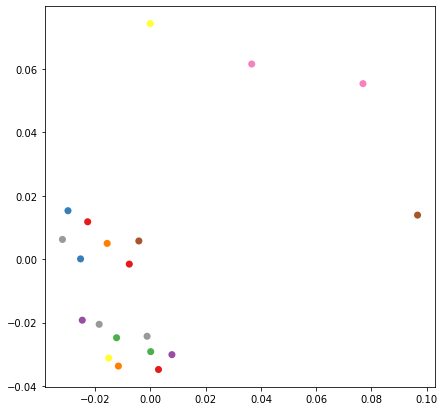

In [ ]:
from sklearn.preprocessing import normalize
from sklearn import manifold
from matplotlib import pyplot as plt
from matplotlib.lines import Line2D


model_mds = manifold.MDS(n_components=2, random_state=0, metric='precomputed')
coords = model_mds.fit_transform(dm_eu)

cmap = plt.get_cmap('Set1')
colors = [cmap(i) for i in np.linspace(0, 1, 20)] 

plt.figure(figsize=(7, 7))
plt.scatter(coords[:, 0], coords[:, 1], marker='o', c=colors, s=50, edgecolor='None')

plt.show()

Tsne

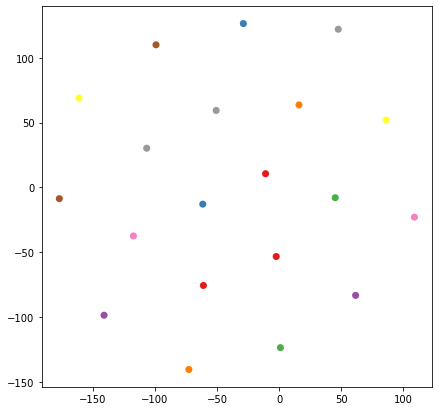

In [ ]:
from sklearn.preprocessing import normalize
from sklearn import manifold
from matplotlib import pyplot as plt
from matplotlib.lines import Line2D


model_mds = manifold.TSNE(n_components=2, random_state=0, metric='precomputed')
coords = model_mds.fit_transform(dm_eu)

cmap = plt.get_cmap('Set1')
colors = [cmap(i) for i in np.linspace(0, 1, 20)] 

plt.figure(figsize=(7, 7))
plt.scatter(coords[:, 0], coords[:, 1], marker='o', c=colors, s=50, edgecolor='None')

plt.show()

In [ ]:
coords

UMAP

In [ ]:
!pip install umap-learn

     |████████████████████████████████| 86 kB 2.7 MB/s 
     |████████████████████████████████| 1.1 MB 28.1 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.2-py3-none-any.whl size=82709 sha256=278b4518d30f33b57bfb3f2dd48d51349c670658e8c5e68027d683700f341a18
  Stored in directory: /root/.cache/pip/wheels/84/1b/c6/aaf68a748122632967cef4dffef68224eb16798b6793257d82
  Created wheel for pynndescent: filename=pynndescent-0.5.5-py3-none-any.whl size=52603 sha256=18f4ad144bf14049b9fb860b6231b6bdc79c16dbf771060f79cade30e5a4a491
  Stored in directory: /root/.cache/pip/wheels/af/e9/33/04db1436df0757c42fda8ea6796d7a8586e23c85fac355f476
Successfully built umap-learn pynndescent


/usr/local/lib/python3.7/dist-packages/umap/umap_.py:1780: UserWarning: using precomputed metric; inverse_transform will be unavailable
  warn("using precomputed metric; inverse_transform will be unavailable")
/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


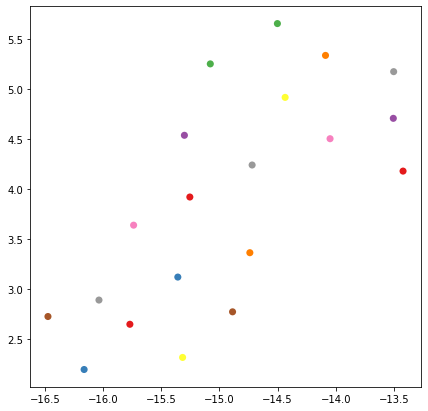

In [ ]:
from umap import UMAP

model_mds = UMAP(n_components=2, random_state=0, metric='precomputed')
coords = model_mds.fit_transform(dm_eu)

cmap = plt.get_cmap('Set1')
colors = [cmap(i) for i in np.linspace(0, 1, 20)] 

plt.figure(figsize=(7, 7))
plt.scatter(coords[:, 0], coords[:, 1], marker='o', c=colors, s=50, edgecolor='None')

plt.show()

#split data 

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, = train_test_split(features, test_size=0.1, random_state=42)

# Keras Variational Autoencoder 

In [ ]:
import tensorflow as tf
from tensorflow import  keras
from  tensorflow.keras.layers import Dense, Flatten, TimeDistributed, Dropout, BatchNormalization, Input, Lambda, LSTM, RepeatVector, Masking
import tensorflow.keras.models
import tensorflow.keras.optimizers
import tensorflow.keras.datasets
import numpy
import matplotlib.pyplot
from tensorflow.keras import backend as K
from keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping

from tensorflow.keras import layers

In [ ]:
# masking 
Masking(mask_value=special_value, input_shape=(max_seq_len, dimension))

## LSTM

for sequences of differnt length use Input(shape=(None, embedding.shape[-1],))

In [ ]:
#batch_size = 5
#MAX_LENGTH=len(ORDER_LIST)*PRUNED_SEQ_LENGTH # length of embedding 
#output_dim=len(ORDER_LIST)*PRUNED_SEQ_LENGTH # used in decoder_out
latent_dim = 2 # could be higher
intermediate_dim = 250
nb_epoch = 10
epsilon_std = 1.0
np.random.seed(42)  

In [ ]:
def sampling(args):
    
    z_mean, z_log_sigma = args
    batch_size = tf.shape(z_mean)[0]
    epsilon = K.random_normal(shape=(batch_size, latent_dim), mean=0., stddev=1.)
    
    return z_mean + K.exp(0.5 * z_log_sigma) * epsilon

In [ ]:
# https://python.tutorialink.com/keras-my_layer-output-returning-kerastensor-object-instead-of-tensor-object-in-custom-loss-function/
def vae_loss(x, x_decoded_mean, z_log_var, z_mean):

    xent_loss = embedding.shape[1] * K.binary_crossentropy(x, x_decoded_mean)
    kl_loss = - 0.5 * K.sum(1 + z_log_var - K.square(z_mean) - K.exp(z_log_var))
    vae_loss = K.mean(xent_loss + kl_loss)

    return vae_loss

In [ ]:
#Encoding Layers
x = Input(shape=(None, embedding.shape[-1],))
h = LSTM(250)(x)

#Latent layers
z_mean=Dense(latent_dim)(h)
z_log_var=Dense(latent_dim)(h)
z = Lambda(sampling, output_shape=(latent_dim,))([z_mean, z_log_var])

encoder = keras.Model(x, [z_mean, z_log_var, z], name="encoder")
encoder.summary()

Model: "encoder"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, None, 1024)] 0                                            
__________________________________________________________________________________________________
lstm (LSTM)                     (None, 250)          1275000     input_1[0][0]                    
__________________________________________________________________________________________________
dense (Dense)                   (None, 2)            502         lstm[0][0]                       
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 2)            502         lstm[0][0]                       
____________________________________________________________________________________________

In [ ]:
x.shape[2]

1024

In [ ]:
#Encoding Layers
x = Input(shape=(embedding.shape[1], embedding.shape[-1],))
h = LSTM(250)(x)

#Latent layers
z_mean=Dense(latent_dim)(h)
z_log_var=Dense(latent_dim)(h)
z = Lambda(sampling, output_shape=(latent_dim,))([z_mean, z_log_var])

encoder = keras.Model(x, [z_mean, z_log_var, z], name="encoder")
encoder.summary()

Model: "encoder"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 1496, 1024)] 0                                            
__________________________________________________________________________________________________
lstm_1 (LSTM)                   (None, 250)          1275000     input_2[0][0]                    
__________________________________________________________________________________________________
dense_2 (Dense)                 (None, 2)            502         lstm_1[0][0]                     
__________________________________________________________________________________________________
dense_3 (Dense)                 (None, 2)            502         lstm_1[0][0]                     
____________________________________________________________________________________________

In [ ]:
# decoded LSTM layer
decoder_h = LSTM(250, return_sequences=True)
decoder_mean = LSTM(embedding.shape[-1], return_sequences=True)

h_decoded = RepeatVector(embedding.shape[1])(z)
h_decoded = decoder_h(h_decoded)

# decoded layer
x_decoded_mean = decoder_mean(h_decoded)

In [ ]:
# end-to-end autoencoder
vae = Model(x, x_decoded_mean)
vae.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 1496, 1024)] 0                                            
__________________________________________________________________________________________________
lstm_1 (LSTM)                   (None, 250)          1275000     input_2[0][0]                    
__________________________________________________________________________________________________
dense_2 (Dense)                 (None, 2)            502         lstm_1[0][0]                     
__________________________________________________________________________________________________
dense_3 (Dense)                 (None, 2)            502         lstm_1[0][0]                     
____________________________________________________________________________________________

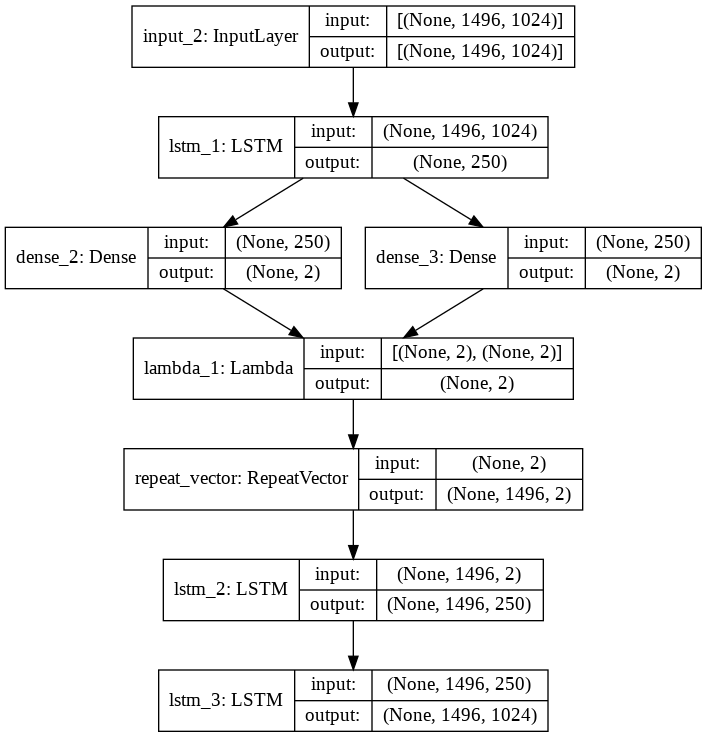

In [ ]:
from keras.utils import np_utils
keras.utils.plot_model(vae, "my_first_model.png", show_shapes= True)

In [ ]:
vae.add_loss(vae_loss(x, x_decoded_mean, z_log_var, z_mean))

In [ ]:
vae.compile(optimizer="adam", loss=None)

In [ ]:
hist=vae.fit(x_train,x_train ,
        shuffle=True,
        epochs=nb_epoch,
        batch_size=5,
        validation_split=0.1) 

Epoch 1/10
4/4 [==============================] - 243s 56s/step - loss: -31.6503 - val_loss: -106.9899
Epoch 2/10
4/4 [==============================] - 225s 54s/step - loss: -99.2686 - val_loss: -113.2817
Epoch 3/10
4/4 [==============================] - 236s 57s/step - loss: -176.3956 - val_loss: -211.6494
Epoch 4/10
4/4 [==============================] - 228s 54s/step - loss: -258.9427 - val_loss: -278.8725
Epoch 5/10
4/4 [==============================] - 226s 54s/step - loss: -237.7894 - val_loss: -336.9953
Epoch 6/10
4/4 [==============================] - 232s 56s/step - loss: -380.5681 - val_loss: -370.3084
Epoch 7/10
4/4 [==============================] - 225s 54s/step - loss: -408.8961 - val_loss: -399.3239
Epoch 8/10
4/4 [==============================] - 229s 55s/step - loss: -443.7595 - val_loss: -422.8557
Epoch 9/10
4/4 [==============================] - 228s 54s/step - loss: -469.7809 - val_loss: -441.0300
Epoch 10/10
4/4 [==============================] - 225s 53s/step -

In [ ]:
encode_seq =  encoder.predict(x_train)

In [ ]:
vae_seq = vae.predict(x_train)

In [ ]:
vae_seq.shape

(18, 1496, 1024)

In [ ]:
x_train.shape

(18, 1496, 1024)

In [ ]:
len(encode_seq[1])

18

In [ ]:
len(encode_seq[1][:, 1])

18

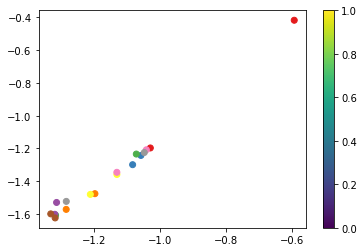

In [ ]:
cmap = plt.get_cmap('Set1')
colors = [cmap(i) for i in np.linspace(0, 1, len(encode_seq[1]) )] 

matplotlib.pyplot.figure()
matplotlib.pyplot.scatter(encode_seq[1][:, 0], encode_seq[1][:, 1], c=colors)  # coordone de premiere d et le coordonne de deuxieme d
matplotlib.pyplot.colorbar()

## MLP

https://github.com/samsinai/VAE_protein_function/blob/master/VAE_for_protein_function_prediction.ipynb

In [ ]:
x = Input(shape=(embedding.shape[1], embedding.shape[-1]))
h = Dense(embedding.shape[1],activation="relu")(x)

In [ ]:
Dense(embedding.shape[1],activation="relu")(embedding)

In [ ]:
embedding.shape[1]

1496

In [ ]:
#MAX_LENGTH = 300 # nb de vectors 1042
#NUM_WORDS = 1000 # acid amine 

In [ ]:
#batch_size = 5
#MAX_LENGTH=len(ORDER_LIST)*PRUNED_SEQ_LENGTH # length of embedding 
#output_dim=len(ORDER_LIST)*PRUNED_SEQ_LENGTH # used in decoder_out
latent_dim = 2 # could be higher
intermediate_dim = 250
nb_epoch = 10
epsilon_std = 1.0
np.random.seed(42)  

In [ ]:
def sampling(args):
    z_mean_, z_log_var = args
    batch_size = K.shape(z_mean_)[0]
    epsilon = K.random_normal(shape=(batch_size, latent_dim), mean=0.,
                               stddev=epsilon_std)
    return z_mean_ + K.exp(z_log_var / 2) * epsilon


loss : https://keras.io/examples/generative/vae/

In [ ]:
def vae_loss(x, x_decoded_mean):
    xent_loss = keras.metrics.binary_crossentropy(x, x_decoded_mean)
    kl_loss = -0.5 * K.mean(1 + z_log_var - K.square(z_mean) - K.exp(z_log_var))
    loss = xent_loss + kl_loss
    return loss

In [ ]:
def vae_loss(self, x, z_decoded):
        x = K.flatten(x)
        z_decoded = K.flatten(z_decoded)
        xent_loss = keras.metrics.binary_crossentropy(x, z_decoded)
        kl_loss = -5e-4 * K.mean(
            1 + z_log_var - K.square(z_mean) - K.exp(z_log_var), axis=-1)
        return K.mean(xent_loss + kl_loss)

In [ ]:
def get_loss(distribution_mean, distribution_variance):
    
    def get_reconstruction_loss(y_true, y_pred):
        reconstruction_loss = keras.losses.mse(y_true, y_pred)
        reconstruction_loss_batch = tf.reduce_mean(reconstruction_loss)
        return reconstruction_loss_batch*256*256
    
    def get_kl_loss(distribution_mean, distribution_variance):
        kl_loss = 1 + distribution_variance - tf.square(distribution_mean) - tf.exp(distribution_variance)
        kl_loss_batch = tf.reduce_mean(kl_loss)
        return kl_loss_batch*(-0.5)
    
    def total_loss(y_true, y_pred):
        reconstruction_loss_batch = get_reconstruction_loss(y_true, y_pred)
        kl_loss_batch = get_kl_loss(distribution_mean, distribution_variance)
        return reconstruction_loss_batch + kl_loss_batch
    
    return total_loss

In [ ]:
#Encoding Layers
x = Input(shape=(embedding.shape[1], embedding.shape[-1],))
h = Dense(550,activation="relu")(x)
h= Dropout(0.2)(h)
h = Dense(550, activation='relu')(h)
h= BatchNormalization()(h) # momentum
#h = Flatten()(h)
#h = Dense(550, activation='relu')(h)
#h = Dense(128, activation='relu')(h)
#h = Dense(32, activation='relu')(h)
#h = Dense(16, activation='relu')(h)

#Latent layers
z_mean=Dense(latent_dim)(h)
z_log_var=Dense(latent_dim)(h)
z = Lambda(sampling, output_shape=(latent_dim,))([z_mean, z_log_var])
#z = Sampling()([z_mean, z_log_var])
encoder = keras.Model(x, [z_mean, z_log_var, z], name="encoder")
encoder.summary()

Model: "encoder"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 1496, 1024)] 0                                            
__________________________________________________________________________________________________
lstm_11 (LSTM)                  (None, 550)          3465000     input_1[0][0]                    
__________________________________________________________________________________________________
dense_10 (Dense)                (None, 2)            1102        lstm_11[0][0]                    
__________________________________________________________________________________________________
dense_11 (Dense)                (None, 2)            1102        lstm_11[0][0]                    
____________________________________________________________________________________________

In [ ]:

#Decoding layers 
x = layers.Reshape((7, 7, 64))(x)
#decoder_1= Dense(550, activation='relu')
#decoder_2=Dense(550, activation='relu')
decoder_2d=Dropout(0.2)
decoder_3=Dense(550, activation='relu')
decoder_out=Dense(embedding.shape[2], activation='softmax')
x_decoded_mean = decoder_out(decoder_3(decoder_2d(decoder_2(decoder_1(z)))))
#decoder = keras.Model(z, decoder_out, name="decoder")


In [ ]:
vae = Model(x, x_decoded_mean)
vae.summary()

Model: "model_8"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_12 (InputLayer)           [(None, 1496, 1024)] 0                                            
__________________________________________________________________________________________________
dense_88 (Dense)                (None, 1496, 550)    563750      input_12[0][0]                   
__________________________________________________________________________________________________
dropout_110 (Dropout)           (None, 1496, 550)    0           dense_88[0][0]                   
__________________________________________________________________________________________________
dense_89 (Dense)                (None, 1496, 550)    303050      dropout_110[0][0]                
____________________________________________________________________________________________

In [ ]:
vae.compile(optimizer="adam", loss=vae_loss,metrics=["categorical_accuracy","fmeasure","top_k_categorical_accuracy"]) 

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3)
#spearman_measure=rho_vs_mutants(test_data_plus,batch_size*int(len(test_data_plus)/batch_size),len(ORDER_LIST),PRUNED_SEQ_LENGTH)

In [ ]:
#x_train=training_data[:data_set_size] #this needs to be divisible by batch size and less than or equal to dataset size
#x_train = x_train.astype('float32')
#x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))

hist=vae.fit(x_train,x_train ,
        shuffle=True,
        epochs=nb_epoch,
        batch_size=5, #sample_weight=np.array(new_weights),
        validation_split=0.1,callbacks=[early_stopping])  

## CNN

https://blog.paperspace.com/how-to-build-variational-autoencoder-keras/

https://outline.com/7xJtZD

Variational Autoencoders as Generative Models with Keras

In [ ]:
img_size = 28
num_channels = 1

In [ ]:
# Encoder
x = tensorflow.keras.layers.Input(shape=(img_size, img_size, num_channels), name="encoder_input")

encoder_conv_layer1 = tensorflow.keras.layers.Conv1D(filters=1, kernel_size=(3, 3), padding="same", strides=1, name="encoder_conv_1")(x)
encoder_norm_layer1 = tensorflow.keras.layers.BatchNormalization(name="encoder_norm_1")(encoder_conv_layer1)
encoder_activ_layer1 = tensorflow.keras.layers.LeakyReLU(name="encoder_leakyrelu_1")(encoder_norm_layer1)

encoder_conv_layer2 = tensorflow.keras.layers.Conv1D(filters=32, kernel_size=(3,3), padding="same", strides=1, name="encoder_conv_2")(encoder_activ_layer1)
encoder_norm_layer2 = tensorflow.keras.layers.BatchNormalization(name="encoder_norm_2")(encoder_conv_layer2)
encoder_activ_layer2 = tensorflow.keras.layers.LeakyReLU(name="encoder_activ_layer_2")(encoder_norm_layer2)

encoder_conv_layer3 = tensorflow.keras.layers.Conv1D(filters=64, kernel_size=(3,3), padding="same", strides=2, name="encoder_conv_3")(encoder_activ_layer2)
encoder_norm_layer3 = tensorflow.keras.layers.BatchNormalization(name="encoder_norm_3")(encoder_conv_layer3)
encoder_activ_layer3 = tensorflow.keras.layers.LeakyReLU(name="encoder_activ_layer_3")(encoder_norm_layer3)

encoder_conv_layer4 = tensorflow.keras.layers.Conv1D(filters=64, kernel_size=(3,3), padding="same", strides=2, name="encoder_conv_4")(encoder_activ_layer3)
encoder_norm_layer4 = tensorflow.keras.layers.BatchNormalization(name="encoder_norm_4")(encoder_conv_layer4)
encoder_activ_layer4 = tensorflow.keras.layers.LeakyReLU(name="encoder_activ_layer_4")(encoder_norm_layer4)

encoder_conv_layer5 = tensorflow.keras.layers.Conv1D(filters=64, kernel_size=(3,3), padding="same", strides=1, name="encoder_conv_5")(encoder_activ_layer4)
encoder_norm_layer5 = tensorflow.keras.layers.BatchNormalization(name="encoder_norm_5")(encoder_conv_layer5)
encoder_activ_layer5 = tensorflow.keras.layers.LeakyReLU(name="encoder_activ_layer_5")(encoder_norm_layer5)

shape_before_flatten = tensorflow.keras.backend.int_shape(encoder_activ_layer5)[1:]
encoder_flatten = tensorflow.keras.layers.Flatten()(encoder_activ_layer5)

encoder_mu = tensorflow.keras.layers.Dense(units=latent_space_dim, name="encoder_mu")(encoder_flatten)
encoder_log_variance = tensorflow.keras.layers.Dense(units=latent_space_dim, name="encoder_log_variance")(encoder_flatten)

encoder_mu_log_variance_model = tensorflow.keras.models.Model(x, (encoder_mu, encoder_log_variance), name="encoder_mu_log_variance_model")

def sampling(mu_log_variance):
    mu, log_variance = mu_log_variance
    epsilon = tensorflow.keras.backend.random_normal(shape=tensorflow.keras.backend.shape(mu), mean=0.0, stddev=1.0)
    random_sample = mu + tensorflow.keras.backend.exp(log_variance/2) * epsilon
    return random_sample

encoder_output = tensorflow.keras.layers.Lambda(sampling, name="encoder_output")([encoder_mu, encoder_log_variance])

encoder = tensorflow.keras.models.Model(x, encoder_output, name="encoder_model")

In [ ]:
# Decoder
decoder_input = tensorflow.keras.layers.Input(shape=(latent_space_dim), name="decoder_input")

decoder_dense_layer1 = tensorflow.keras.layers.Dense(units=numpy.prod(shape_before_flatten), name="decoder_dense_1")(decoder_input)
decoder_reshape = tensorflow.keras.layers.Reshape(target_shape=shape_before_flatten)(decoder_dense_layer1)

decoder_conv_tran_layer1 = tensorflow.keras.layers.Conv2DTranspose(filters=64, kernel_size=(3, 3), padding="same", strides=1, name="decoder_conv_tran_1")(decoder_reshape)
decoder_norm_layer1 = tensorflow.keras.layers.BatchNormalization(name="decoder_norm_1")(decoder_conv_tran_layer1)
decoder_activ_layer1 = tensorflow.keras.layers.LeakyReLU(name="decoder_leakyrelu_1")(decoder_norm_layer1)

decoder_conv_tran_layer2 = tensorflow.keras.layers.Conv2DTranspose(filters=64, kernel_size=(3, 3), padding="same", strides=2, name="decoder_conv_tran_2")(decoder_activ_layer1)
decoder_norm_layer2 = tensorflow.keras.layers.BatchNormalization(name="decoder_norm_2")(decoder_conv_tran_layer2)
decoder_activ_layer2 = tensorflow.keras.layers.LeakyReLU(name="decoder_leakyrelu_2")(decoder_norm_layer2)

decoder_conv_tran_layer3 = tensorflow.keras.layers.Conv2DTranspose(filters=64, kernel_size=(3, 3), padding="same", strides=2, name="decoder_conv_tran_3")(decoder_activ_layer2)
decoder_norm_layer3 = tensorflow.keras.layers.BatchNormalization(name="decoder_norm_3")(decoder_conv_tran_layer3)
decoder_activ_layer3 = tensorflow.keras.layers.LeakyReLU(name="decoder_leakyrelu_3")(decoder_norm_layer3)

decoder_conv_tran_layer4 = tensorflow.keras.layers.Conv2DTranspose(filters=1, kernel_size=(3, 3), padding="same", strides=1, name="decoder_conv_tran_4")(decoder_activ_layer3)
decoder_output = tensorflow.keras.layers.LeakyReLU(name="decoder_output")(decoder_conv_tran_layer4 )

decoder = tensorflow.keras.models.Model(decoder_input, decoder_output, name="decoder_model")

decoder.summary()

In [ ]:
# Building the VAE

vae_input = tensorflow.keras.layers.Input(shape=(img_size, img_size, num_channels), name="VAE_input")

vae_encoder_output = encoder(vae_input)
vae_decoder_output = decoder(vae_encoder_output)

vae = tensorflow.keras.models.Model(vae_input, vae_decoder_output, name="VAE")
vae.summary()


In [ ]:
# loss function
def loss_func(encoder_mu, encoder_log_variance):
    def vae_reconstruction_loss(y_true, y_predict):
        reconstruction_loss_factor = 1000
        reconstruction_loss = tensorflow.keras.backend.mean(tensorflow.keras.backend.square(y_true-y_predict), axis=[1, 2, 3])
        return reconstruction_loss_factor * reconstruction_loss

    def vae_kl_loss(encoder_mu, encoder_log_variance):
        kl_loss = -0.5 * tensorflow.keras.backend.sum(1.0 + encoder_log_variance - tensorflow.keras.backend.square(encoder_mu) - tensorflow.keras.backend.exp(encoder_log_variance), axis=1)
        return kl_loss

    def vae_kl_loss_metric(y_true, y_predict):
        kl_loss = -0.5 * tensorflow.keras.backend.sum(1.0 + encoder_log_variance - tensorflow.keras.backend.square(encoder_mu) - tensorflow.keras.backend.exp(encoder_log_variance), axis=1)
        return kl_loss

    def vae_loss(y_true, y_predict):
        reconstruction_loss = vae_reconstruction_loss(y_true, y_predict)
        kl_loss = vae_kl_loss(y_true, y_predict)

        loss = reconstruction_loss + kl_loss
        return loss

    return vae_loss

In [ ]:
vae.compile(optimizer=tensorflow.keras.optimizers.Adam(lr=0.0005), loss=loss_func(encoder_mu, encoder_log_variance))

### Training the VAE

In [ ]:
vae.fit(x_train, x_train, epochs=20, batch_size=256, shuffle=True, validation_data=(x_test, x_test))

### Testing the VAE

In [ ]:
encoded_data = encoder.predict(x_test)
decoded_data = decoder.predict(encoded_data)

In [ ]:
matplotlib.pyplot.figure()
matplotlib.pyplot.scatter(encoded_images[:, 0], encoded_images[:, 1], c=y_train)
matplotlib.pyplot.colorbar()

In [ ]:
# save model
encoder.save("VAE_encoder.h5") 
decoder.save("VAE_decoder.h5") 
vae.save("VAE.h5")

In [ ]:
# laod model
encoder = tensorflow.keras.models.load_model("VAE_encoder.h5") 
decoder = tensorflow.keras.models.load_model("VAE_decoder.h5")

# Pytorch Variational Autoencoder


In [ ]:
import torch; torch.manual_seed(0)
import torch.nn as nn
import torch.nn.functional as F
import torch.utils
import torch.distributions
import torchvision
import numpy as np
import matplotlib.pyplot as plt ; plt.rcParams['figure.dpi'] = 200
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [ ]:
class VariationalEncoder(nn.Module):
    def __init__(self, latent_dims):
        super(VariationalEncoder, self).__init__()
        self.linear1 = nn.Linear(embedding.shape[1], embedding.shape[2])
        self.linear2 = nn.Linear(embedding.shape[1], latent_dims)
        self.linear3 = nn.Linear(embedding.shape[1], latent_dims)

        self.N = torch.distributions.Normal(0, 1)
        self.N.loc = self.N.loc.cuda() # hack to get sampling on the GPU
        self.N.scale = self.N.scale.cuda()
        self.kl = 0

    def forward(self, x):
        x = torch.flatten(x, start_dim=1)
        x = F.relu(self.linear1(x))
        mu =  self.linear2(x)
        sigma = torch.exp(self.linear3(x))
        z = mu + sigma*self.N.sample(mu.shape)
        self.kl = (sigma**2 + mu**2 - torch.log(sigma) - 1/2).sum()
        return z


In [ ]:
class VariationalAutoencoder(nn.Module):
    def __init__(self, latent_dims):
        super(VariationalAutoencoder, self).__init__()
        self.encoder = VariationalEncoder(latent_dims)
        self.decoder = Decoder(latent_dims)

    def forward(self, x):
        z = self.encoder(x)
        return self.decoder(z)


In [ ]:
def train(autoencoder, data, epochs=20):
    opt = torch.optim.Adam(autoencoder.parameters())
    for epoch in range(epochs):
        for x, y in data:
            x = x.to(device) # GPU
            opt.zero_grad()
            x_hat = autoencoder(x)
            loss = ((x - x_hat)**2).sum() + autoencoder.encoder.kl
            loss.backward()
            opt.step()
    return autoencoder


In [ ]:
vae = VariationalAutoencoder(latent_dims).to(device) # GPU
vae = train(vae, x_train)

In [ ]:
def plot_latent(autoencoder, data, num_batches=100):
    for i, (x, y) in enumerate(data):
        z = autoencoder.encoder(x.to(device))
        z = z.to('cpu').detach().numpy()
        plt.scatter(z[:, 0], z[:, 1], c=y, cmap='tab10')
        if i > num_batches:
            plt.colorbar()
            break

In [ ]:
plot_latent(vae, data)